In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import neurokit2 as nk

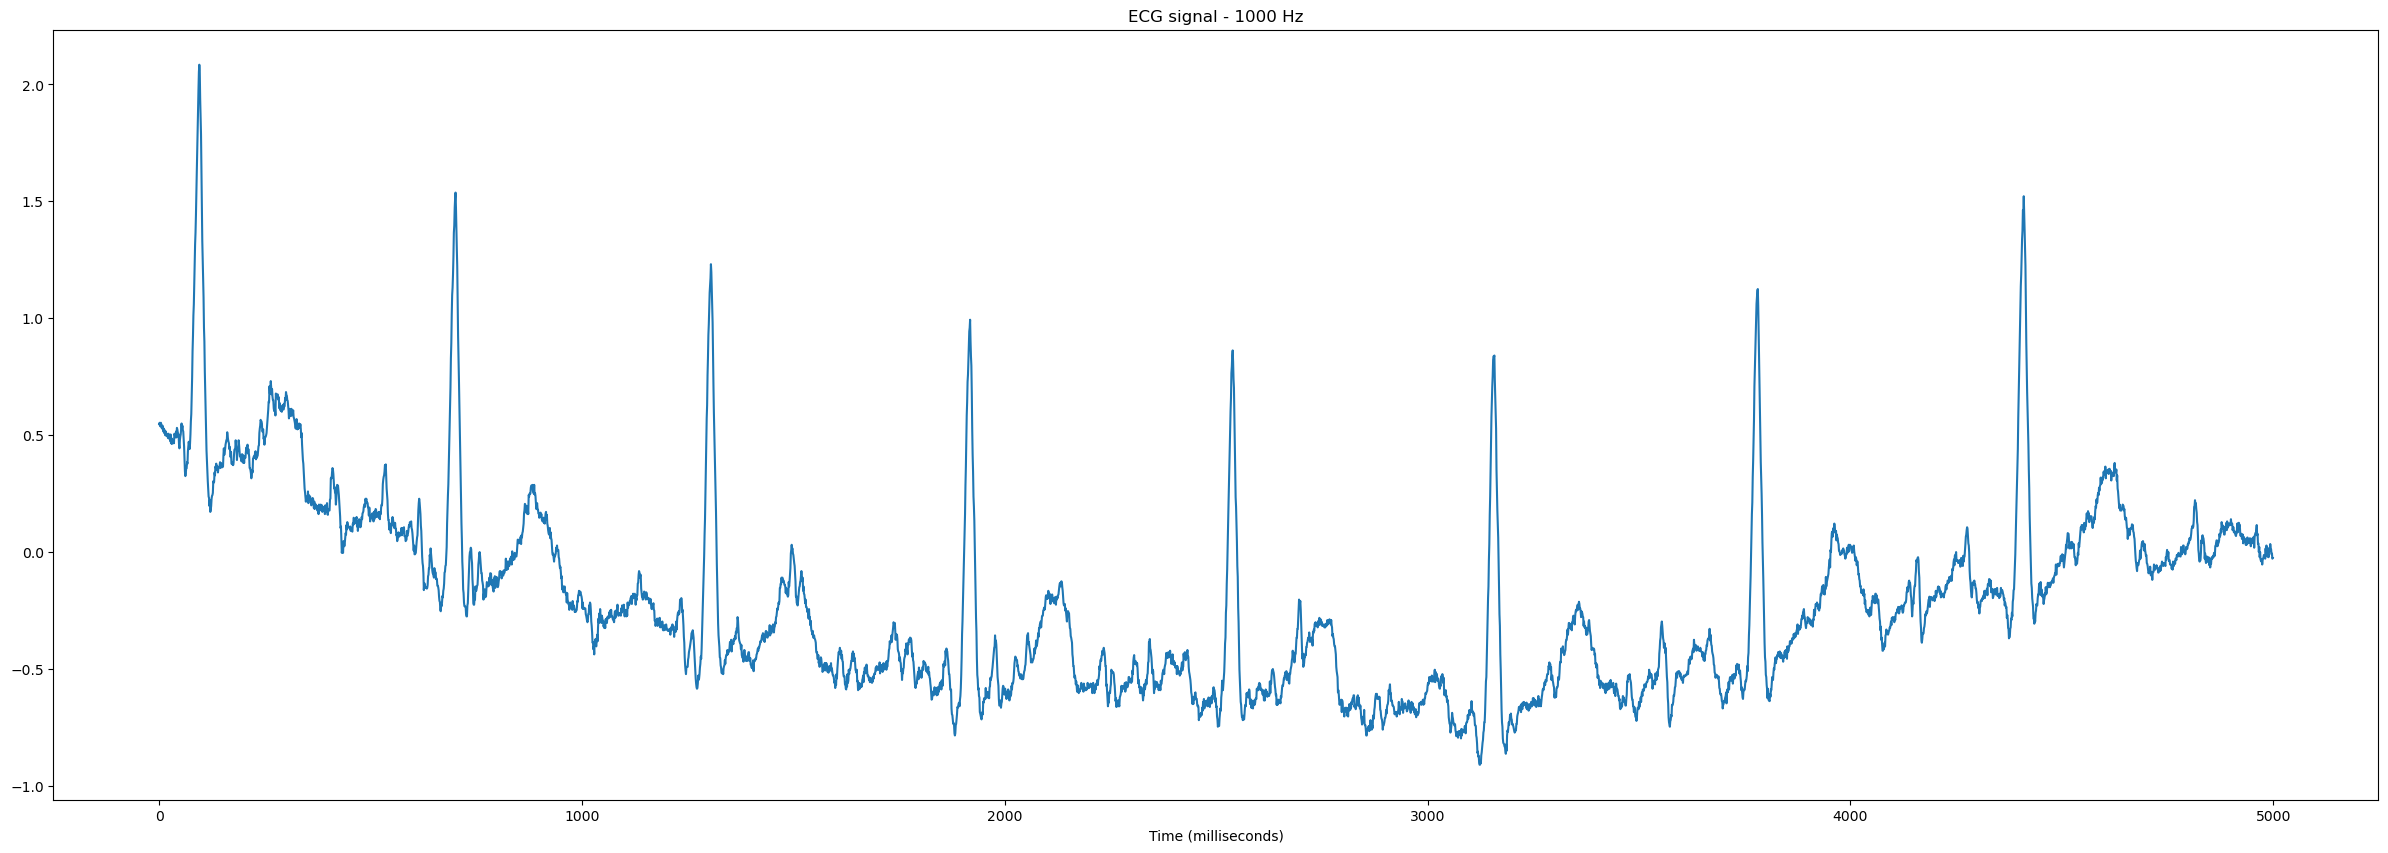

In [12]:
path = r'./data/sample_file_ECG.csv'
df = pd.read_csv(path)

# plot
plt.figure(figsize=(30,10))
plt.plot(df.ecg[0:5000])
plt.title("ECG signal - 1000 Hz")
plt.xlabel('Time (milliseconds)')
plt.show()

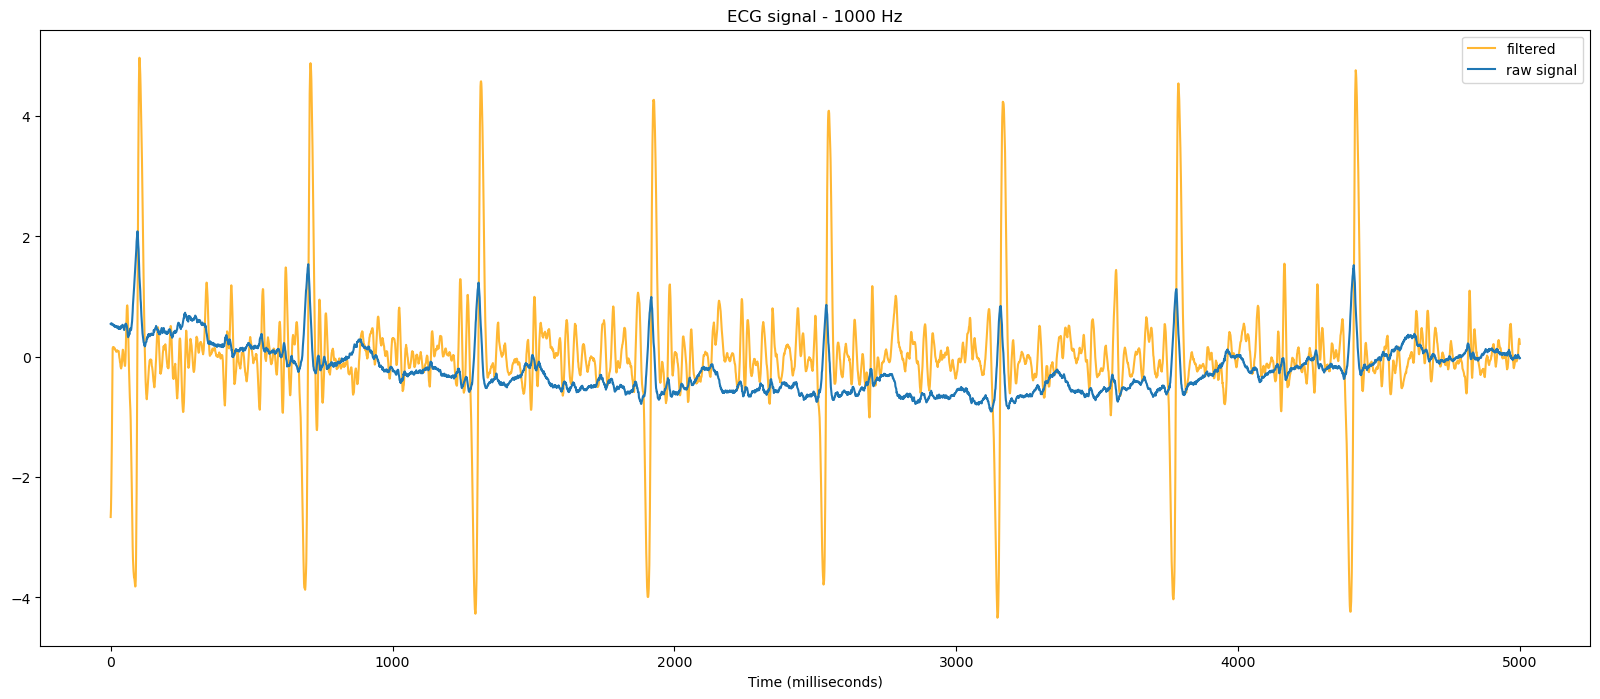

In [13]:
# linear spaced vector between 0.5 pi and 1.5 pi 
v = np.linspace(0.5 * np.pi, 1.5 * np.pi, 15)

# create sine filter for approximating QRS feature
peak_filter = np.sin(v)

# compute cross correlation between ecg and the sine filter
ecg_transformed = np.correlate(df.ecg, peak_filter, mode="same")

# and plot the raw + filtered signal
plt.figure(figsize=(20,8))
plt.title('ECG signal - 1000 Hz')
plt.plot(ecg_transformed[0:5000], alpha = 0.8, c='orange')
plt.plot(df.ecg[0:5000], alpha = 1)
plt.gca().legend(('filtered','raw signal'))
plt.xlabel('Time (milliseconds)')
plt.show()

[ 0.35361176  0.40294979  0.4494891  ... -0.00180953 -0.00176648
 -0.00172152]


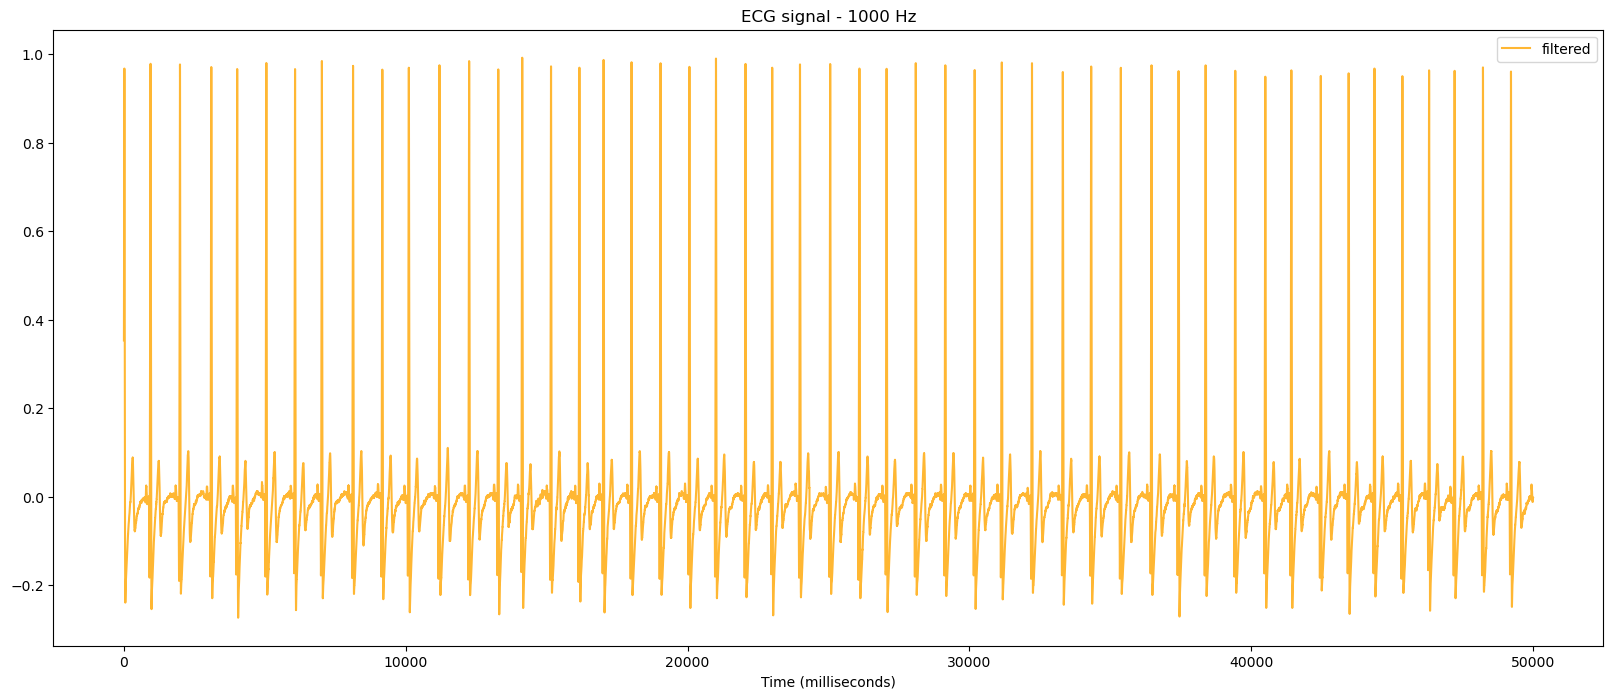

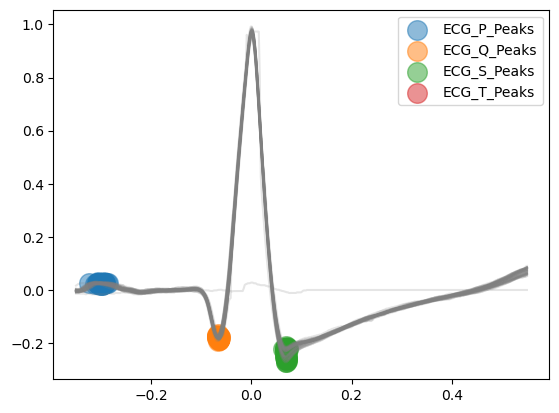

In [24]:
# Retrieve ECG data from data folder
ecg_signal = nk.data(dataset="ecg_1000hz")
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=1000)
data = nk.data(dataset="ecg_1000hz")
print(data)
plt.figure(figsize=(20,8))
plt.title('ECG signal - 1000 Hz')
plt.plot(data, alpha = 0.8, c='orange')
plt.gca().legend(('filtered','raw signal'))
plt.xlabel('Time (milliseconds)')
plt.show()

signal_dwt, waves_dwt = nk.ecg_delineate(data, 
                                        rpeaks, 
                                        sampling_rate=500, 
                                        method="dwt", 
                                        show=True, 
                                        show_type='peaks')